# Matplotlib Practice # 2

### Introduction to Figures
- from https://matplotlib.org/stable/users/explain/figure/figure_intro.html

#### Figures and backends
- When looking at Matplotlib visualization, you are almost always looking at Artists placed on a Figure. In the example below, the figure is the blue region and add_subplot() has added an Axes artist to the Figure. A more complicated visualization can add multiple Axes to the Figure, colorbars, legends, annotations, and the Axes themsleves can have multiple Artists added to them (e.g. ax.plot or ax.imshow).

In [1]:
import matplotlib.pyplot as plt

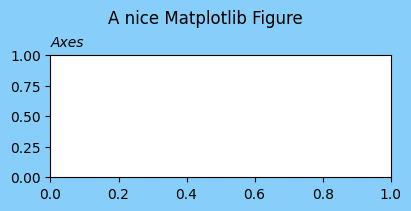

In [2]:
fig = plt.figure(figsize=(4, 2), facecolor="lightskyblue", layout="constrained")
fig.suptitle("A nice Matplotlib Figure")
ax = fig.add_subplot()
ax.set_title("Axes", loc="left", fontstyle="oblique", fontsize="medium")
plt.show()

#### Creating Figures
- By far the most common way to create a figure is using the pyplot interface. As noted in Matplotlib APIs, the pyplot interface serves two purposes. One is to spin up the Backend and keep track of GUI windows. The other is a global state for Axes and Artists that allow a short-form API to plotting methods. In the example above, we use pyplot for the first purpose, and create the Figure object, fig. as a side effect fig is also added to pyplot's global state, and can be accessed via gcf() function.
- Users typically want an Axes or a grid of Axes when they create a Figure, so in addition to figure, there are convenience methods that return both a Figure and some Axes. A simple grid of Axes can be achieved with pyplot.subplots() (which simply wraps Figure.subplots()):

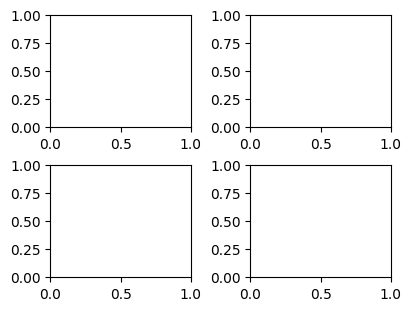

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(4, 3), layout="constrained")
plt.show()

- More complex grids can be achieved with pyplot.subplot_mosaic() function (which wraps Figure.subplot_mosaic())

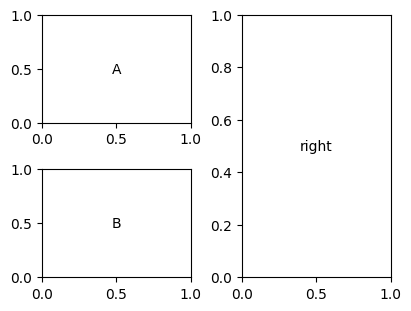

In [4]:
fig, axs = plt.subplot_mosaic([["A", "right"], ["B", "right"]], figsize=(4, 3), layout="constrained")
for ax_name, ax in axs.items():
    ax.text(0.5, 0.5, ax_name, ha="center", va="center")
plt.show()

- Sometimes we want to have a nested layout in a Figure, with two or more sets of Axes that do not share the same subplot grid. We can use add_subfigre() or subfigures() to create virtual figures inside a parent Figure.

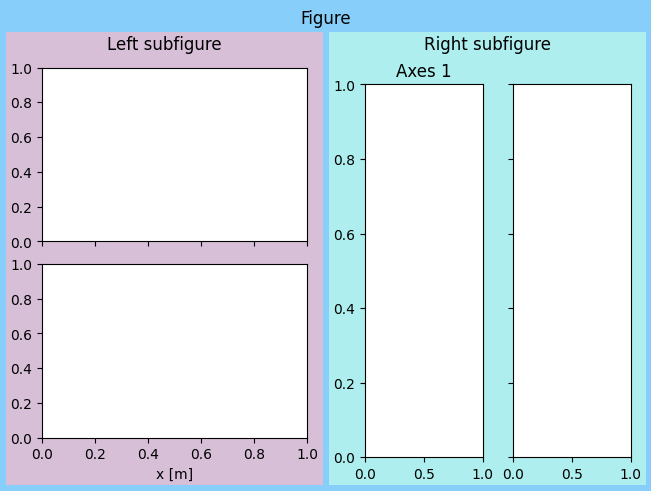

In [5]:
fig = plt.figure(layout="constrained", facecolor="lightskyblue")
fig.suptitle("Figure")

figL, figR = fig.subfigures(1, 2) # create 2 figures
figL.set_facecolor("thistle") # set the left figure color

axL = figL.subplots(2, 1, sharex=True) # create 2 axes
axL[1].set_xlabel("x [m]") # set the title on the bottom ax for left figure
figL.suptitle("Left subfigure")

figR.set_facecolor("paleturquoise") # set color for right figure
axR = figR.subplots(1, 2, sharey=True) # craete 2 axes
axR[0].set_title("Axes 1") # set the title for the left ax
figR.suptitle("Right subfigure")

plt.show()

- It is possible to directly instantiate a Figure instance without using the pyplot interface. This is usually only necessary if you want to create your own GUI application or service that you do not want carrying the pyplot global state.

#### Figure Options
- There are a few options available when creating figures. The figure size on the screen is set by figsize and dpi. figsize is the (width, height) of the Figure in inches (or, if preferred, units of 72 typographic points). dpi are how many pixels per inch the figure will be rendered at. To make your Figures appear on the screen at the physical size you requested, you should set dpi to the same dpi as your graphics system. Note that many graphics systems now use a "dpi ratio" to specify how many screen pixels are used to represent a graphics pixel. Matplotlib applies the dpi ratio to the dpi passed to the figure to make it have higher resolution, so you should pass the lower number to the figure.
- The facecolor, edgecolor, linewidth, and frameon options all change the appearance of the figure in expected ways, with frameon making the figure transparent if set to False.
- Finally, the user can specify a layout engine for the figure with the layout parameter. Currently Matplotlib supplies "constrained", "compressed", and "tight" layout engines. These rescales axes inside the Figure to prevent overlap of ticklabels, and try and align axes, and can save significant manual adjustment of artists on a Figure for many common cases.

#### Adding Artists
- The Figure class has a number of methods for adding artists to a Figure or a SubFigure. By far the most common are to add Axes of various configurations (add_axes(), add_subplots(), subplots(_, subplot_mosaic)) and subfigures (subfigure()). Colorbars are added to Axes or group of Axes at the Figure level (colorbar). It is possible to have a Figure-level legend (legend()). Other Artists include figure-wide labels (suptitle(), supxlabel(), supylabel()) and text (text()). Finally, low-level Artists can be added directly using add_artist() usually with care being taken to use the appropriate transform. Usually these include Figure.transFigure() which ranges from 0 to 1 in each direction, and represents the fraction of the current Figure size, or Figure.dpi_scale_trans() which will be in physical units of inches from the bottomo left corner of the Figure.

#### Saving Figures
- Finally, Figures can be saved to disk using savefig() method. fig.savefig("MyFigure.png", dpi=200) will save a PNG formatted figure to the file MyFigure.png in the current directory on disk with 200 dot-per-inch resolution. Note that the filename can include a relative or absolute path to any place on the file system.
- Many types of output are supported, including raster formats like PNG, GIF, JPEG, TIFF and vector formats like PDF, EPS, and SVG.
- By default, the size of the saved Figure is set by the Figure size (in inches) and, for the raster formats, the dpi. If dpi is not set, then the dpi of the Figure is used. Note that dpi still has meaning for vector formats like PDF if the Figure includes Artists that have been rasterized; the dpi specified will be the resoluation of the rasterized objects.
- It is possible to change the size of the Figure using the bbox_inches argument to savefig. This can be specified manually, again in inches. However, by far the most common use is bbox_inches="tight". This option "shrink-wraps", trimming or expanding as needed, the size of the figure so that it is tight around all the artists in a figure, with a small pad that can be specified by pad_inches, which defaults to 0.1 inches. The dashed box in the plot below shows the portion of the figure that would be saved if bbox_inches="tight" were used in savefig.

### Backends
- from https://matplotlib.org/stable/users/explain/figure/backends.html

#### What is a backend?
- Backends are used for displaying Matplotlib figures, on the screen, or for writing to files. A lot of documentation on the website and in the mailing lists refers to the "backend" and many new users are confused by the term. Matplotlib targets many different use cases and output formats. Some people use Matplotlib interactively from the Python shell and have plotting windows pop up when they type commands. Some people run Jupyter noteboks and draw inline plots for quick data analysis. Others embed Matplotlib into graphical user interfaces like PyQt or PyGObject to build rich applications. Some people use Matplotlib in batch scripts to generate postscripts images from numerical simulations, and still others run web application servers to dynamically serve up graphs.
- To support all these use cases, Matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the use facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure. These are two types of backends: user interface backends (for use in PyQt/PySide, Tkinter, wxPython, or MacOS/Cocoa); also referred to as "interactive backends" and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").
#### Selecting a backend
- There are three ways to configure your backend:
    - The rcParams["backend"] parameter in your matplotlibrc file
    - The MPLBACKEND environment variable
    - The function matplotlib.use()
- If there is more than one configuration present, the last one from the list takes precedence; e.g. calling matplotlib.use() will override the setting in your matplotlibrc file.
- Without a backend explicitly set, Matplotlib automatically detects a usable backend based on what is available on your system and on whether a GUI event loop is already running. The first usable backend in the following list is selected: MacOSX, QtAgg, GTK4Agg, Gtk3Agg, TKAgg, WxAgg, Agg. The last, Agg, is a non-interactive backend that can only write to files. It is used on Linux, if Matplotlib cannot connect to either an X display or a Wayland display.
- Here is a detailed description of the configuration methods:
1. Setting rcParams["backend"] in your matplotlibrc file:
```
backend: qtagg # use pyqt with antigrain (agg) rendering
```
2. Setting the MPLBACKEND environment variable: you can set the environment variable either for your current shell or for a single script. 
- On Unix:
```
export MPLBACKEND=qtagg
python simple_plot.py

MPLBACKEND=qtagg ptyhon simple_plot.py
```
- Windows, only the former is possible:
```
set MPLBACKEND=qtagg
python simple_plot.py
```
Setting this environment variable will override the backend parameter in any matplotlibrc file, even if there is a matplotlibrc in your current working directory. Therefore, setting MPLBACKEND globaly, e.g. is your .bashrc or .profile, is discouraged as it might lead to counter-intuitive behavior.
3. If your script depends on a specific backend you can use the function matplotlib.use():
```python
import matplotlib
matplotlib.use("qtagg")
```
This should be done before any figure is created, otherwise Matplotlib may fail to switch the backend and raise an ImportError. Using use() will require changes in your code if users want to use a different backend. Therefore, you should avoid explicitly calling use() unless absolutely necessary.

#### The builtin backends
- By default, Matplotlib should automatically select a default backend which allows both interactive work and plotting from scripts, with output to the screen and/or to a file, so at least initially, you will not need to worry about the backend. The most common exception is if your Python distribution comes without tkinter and you have no other GUI toolkit installed. This happens with certain Linux distributions, where you need to install a Linux package named python-tk (or similar).
- If, however, you want to write graphical user interfaces, or a web application server (Embed in a web application server (Flask)), or need a better understanding of what is going on, read on. To make things easily more customizable for graphical user interfaces, Matplotlib separates the concept of the renderer (the thing that actually does the drawing) from the canvas (the place where the drawing goes). The canonical renderer for user interfaces is Agg which uses the Anti-Grain Geometry C++ library to make a raster (pixel) image of the figure; it is used by the QtAgg, GTK4Agg, GTK3Agg, wxAgg, TkAgg, and macosx backends. An alternative renderer is based on the Cairo library, used by QtCairo, etc.
- For the rendering engines, users can also distinguish between vector or raster renderers. Vector graphics languages issue drawing commands like "draw a line from this point to this point" and hence are scale free. Raster backends generate a pixel representation of the line whose accuracy depends on a DPI setting.
#### Static backends
- Here is a summary of the Matplotlib renderers (there is an eponymous backend for each; these are non-interactive backends, capable of writing to a file):

| Renderer   | Filetypes             | Description                                                                  |
| ---------- | -----------           | -----------                                                                  | 
| AGG        | png                   | raster graphics -- high quality images using the Anti-Grain Geometry engine. |
| PDF        | pdf                   | vector graphics -- Portable Document Format output. |
| PS         | ps, eps               | vector graphics -- PostScript output. |
| SVG        | svg                   | vector graphics -- Scalable Vector Graphics output. |
| PGF        | pgf, pdf              | vector graphics -- using the pgf package. |
| Cairo      | png, ps, pdf, svg     | raster or vector graphics -- using the Cairo library (requires pycairo or cairocffi). |

- To save plots using the non-interactive backends, use the matplotlib.pyplot.savefig("filename")

#### Interactive backends
- These are the user interfaces and renderer combinations supported; these are interactive backends, capable of displaying to the screen and using appropriate renderers from the table above to write to a file:

| Backend | Description |
| -------- | ---------- |
| QtAgg | Agg rendering in a Qt canvas (requires PyQt or Qt for Python, a.k.a. PySide). This backend can be activated in IPython with %matplotlib qt. The Qt binding can be selected via the QT_API environment variable; see Qt Bindings for more details. |
| ipympl | Agg rendering embedded in a Jupyter widget (requires ipympl). This backend can be enabled in a Jupyter notebook with %matplotlib ipympl or %matplotlib widget. Works with Jupyter lab and notebook>=7. |
| GTK3Agg | Agg rendering to a GTK 3.x canvas (requires PyGObject and pycairo). This backend can be activated in IPython with %matplotlib gtk3. |
| GTK4Agg | Agg rendering to a GTK 4.x canvas (requires PyGObject and pycairo). This backend can be activated in IPython with %matplotlib gtk4. |
| macosx | Agg rendering into a Cocoa canvas in macOS. This backend can be activated in IPython with %matplotlib osx. |
| TkAgg | Agg rendering to a Tk canvas (requires TkInter). This backend can be activated in IPython with %matplotlib tk. |
| nbAgg | Embed an interactive figure in a Jupyter classic notebook. This backend can be enabled in Jupyter notebooks via %matplotlib notebook or %matplotlib nbagg. Works with Jupyter notebook<7 and nbclassic. |
| WebAgg | On show() will start a tornado server with an interactive figure. |
| GTK3Cairo | Cairo rendering to a GTK 3.x canvas (requires PyGObject and pycairo). |
| GTK4Cairo | Cairo rendering to a GTK 4.x canvas (requires PyGObject and pycairo). |
| wxAgg | Agg rendering to a wxWidgets canvas (requires wxPython 4). This backend can be activated in IPython with %matplotlib wx. |

#### Debugging the figure windows not showing
- Sometimes things do not work as expected, usually during an install.
- If you are using a Notebook or integrated development environment (see Notebooks and IDEs), please consult their documentation for debugging figures not working in their environments.
- If you are using one of Matplotlib's graphics backends (see Standalone scripts and interactive use), make sure you know which one is being used:


In [13]:
import matplotlib

print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


### Matplotlib Application Interfaces (APIs)
- From https://matplotlib.org/stable/users/explain/figure/api_interfaces.html
- Matplotlib has two major application interfaces, or styles of using the library:
    - An explicit "Axes" interface that uses metods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.
    - An implicit "pyplot" interface that keeps track of the last Figure and Axes crated, and adds Artists to the object it thinks the user wants.
- In addition, a number of downstream libraries (like pandas and xarray) offer a plot method implemented directly on their data clases so that users can call data.plot().
- The difference between these interfaces an be a bit confusing, particularly given snippets on the web that use one or the other, or sometimes multiple interfaces in the same example. Here we attempt to point out how the "pyplot" and downstream interfaces relate to the explicit "Axes" interface to help users better nagivate the library.

### Native Matplotlib interfaces
#### The explicit "Axes" interface
- The "Axes" interface is how Matplotlib is implemented, and many customizations and fine-tuning end up being done at this level.
- This interface works by instantiating an instance of a Figure class (fig below), using subplots() method (or similar) on that object to create one or more Axes objects (ax below), and then calling drawing methods on the Axes (plot in this example): 

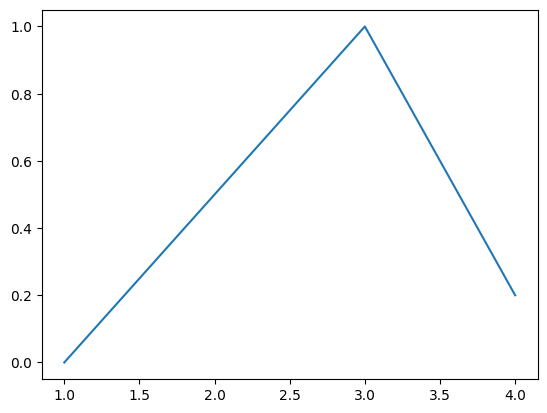

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()
ax.plot([1, 2, 3, 4], [0, 0.5, 1., 0.2])

plt.show()

- We call this an "explicit" interface because each object is explicitly referenced, and used to make the next object. Keeping references to the objects is very flexible, and allows us to customize the objects after they are created, but before they are displayed.

#### The implicit "pyplot" interface
- The pyplot module shadows most of the Axes plotting methods to give the equivalent of the above, where the creation of the Figure and Axes is done for the user:

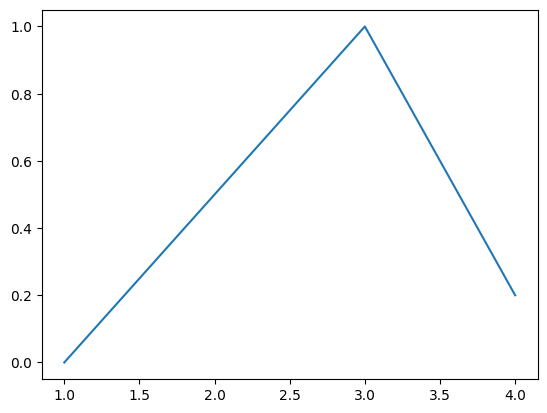

In [7]:
plt.plot([1, 2, 3, 4], [0, 0.5, 1., 0.2])
plt.show()

- This can be convenient, particularly when doing interactive work or simple scripts. A reference to the current Figure can be retrieved using gcf() and to the current Axes by gca(). The pyplot module retains a list of Figures, and each Figure retains a list of Axes on the figure for the user so that the following:

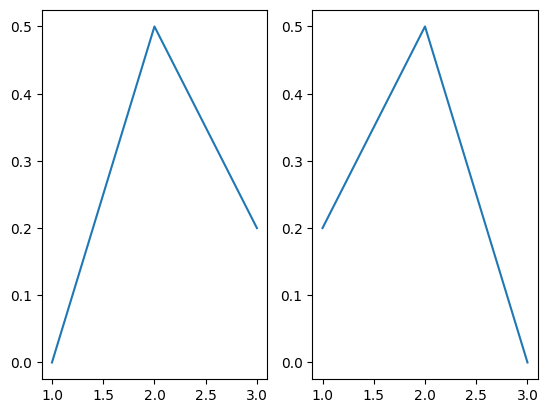

In [8]:
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.show()

- is equivalent to:

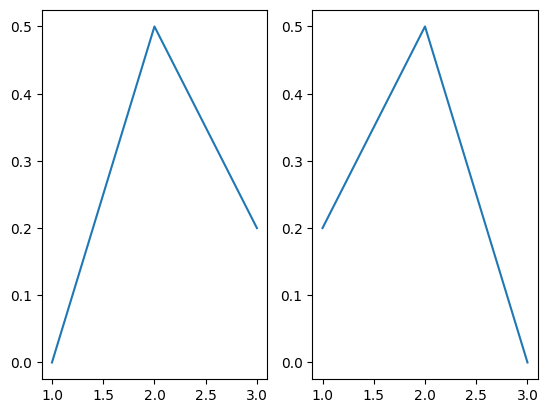

In [9]:
plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot([3, 2, 1], [0, 0.5, 0.2])

plt.show()

- In the explicit interface, this would be:

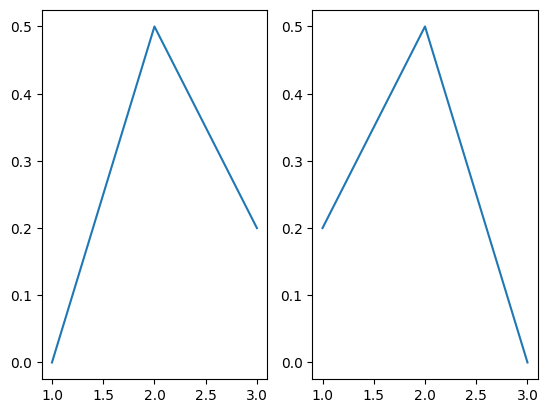

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])

plt.show()

#### Translating between the Axes interface and the pyplot interface
- You may find either interface in existing code, and unfortunately sometimes even mixtures. This section describes the patterns for specific operations in both interfaces and how to translate from one to the other.
    - Creating figures is the same for both interfaces: Use the respective pyplot functions **plt.figure()**, **plt.subplots()**, **plt.subplot_mosaic()**. For the Axes interface, you typically store the created Figure (and possibly Axes) in variables for later use. When using the pyplot interface, these values are typically not stored. Example:
        - Axes: fig, ax = plt.subplots()
        - pyplot: **plt.subplots()**
    - "Plotting" functions, i.e. functions that add data, are named the same and have identical parameters on the Axes and in pyplot. Example:
        - Axes: ax.plot(x, y)
        - pyplot: **plt.plot(x, y)**
    - Functions that retrieve properties are named like the property in pyplot and are prefixed with get_ on the Axes. Example:
        - Axes: label = **ax.get_xlabel()**
        - pyplot: label = **plt.xlabel()**
    - Functions that set properties like the property in pyplot and are prefixed with set_ on the Axes. Example:
        - Axes: **ax.set_xlabel("time")**
        - pyplot: **plt.xlabel("time")**

- Here is a short summary of the examples again as a side-by-side comparison:

| Operation             | Axes interface            | pyplot interface      |
| ------------          | ----------------------    | ---------------       |
| Creating figures      | fig, ax = plt.subplots()  | **plt.subplots()**        |
| Plotting data         | ax.plot(x, y)             | **plt.plot(x, y)**        |
| Getting properties    | label = ax.get_xlabel()   | **label = plt.xlabel()** |
| Setting properties    | ax.set_xlabel("time")     | **plt.xlabel("time")**    |



#### Why be explicit?
- What happens if you have to backtrack, and operate on an old axes that is not referenced by plt.gca()? One simple way is to call subplot again with the same arguments. However, that quickly becomes inelegant. You can also inspect the Figure object and get its list of Axes objects, however, that can be misleading (colorbars are Axes too!). The best solution is probably to save a handle to every Axes you create, but if you do that, why not simply create the all the Axes objects at the start?

- The first approach is to call plt.subplot again:

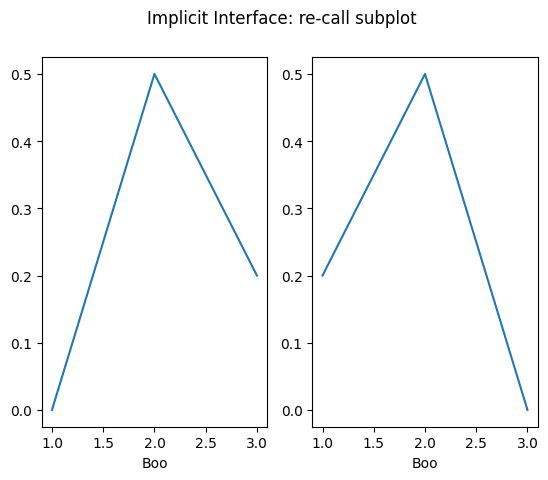

In [11]:
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3], [0, 0.5, 0.2])

plt.subplot(1, 2, 2)
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: re-call subplot')

for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.xlabel('Boo')

plt.show()

- The second is to save a handle:

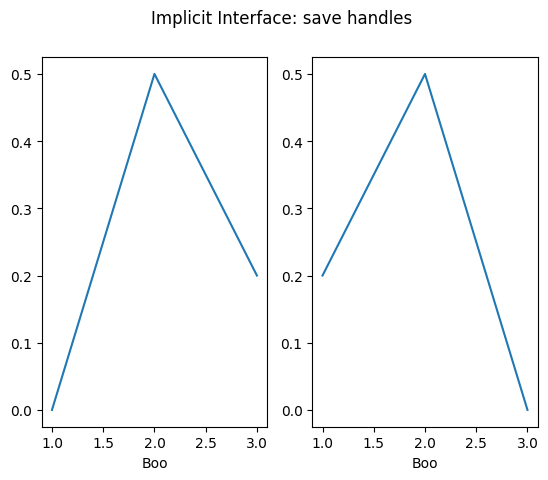

In [12]:
axs = []
ax = plt.subplot(1, 2, 1)
axs += [ax]
plt.plot([1, 2, 3], [0, 0.5, 0.2])

ax = plt.subplot(1, 2, 2)
axs += [ax]
plt.plot([3, 2, 1], [0, 0.5, 0.2])

plt.suptitle('Implicit Interface: save handles')

for i in range(2):
    plt.sca(axs[i])
    plt.xlabel('Boo')

plt.show()

- However, the recommended way would be to be explicit from the outset:

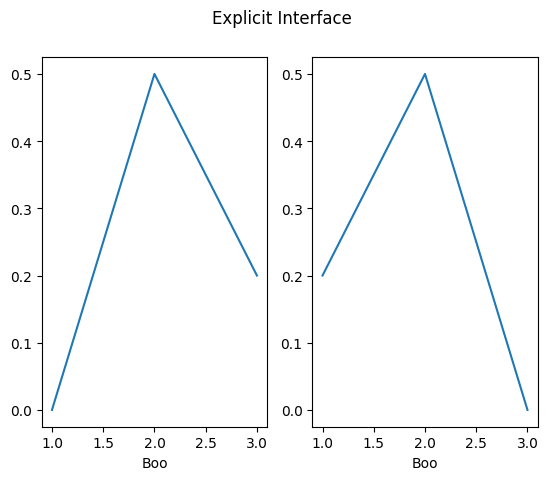

In [13]:
fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 2, 3], [0, 0.5, 0.2])
axs[1].plot([3, 2, 1], [0, 0.5, 0.2])
fig.suptitle('Explicit Interface')
for i in range(2):
    axs[i].set_xlabel('Boo')

plt.show()

#### Third-party library "Data-object" interfaces
- Some third party libraries have chosen to implement plotting for their data objects, e.g. data.plot(), is seen in pandas, xarray, and other third-party libraries. For illustrative purposes, a downstream library may implement a simple data container that has x and y data stored together, and then implements a plot method:

<Axes: title={'center': 'Plotted from DataClass!'}>

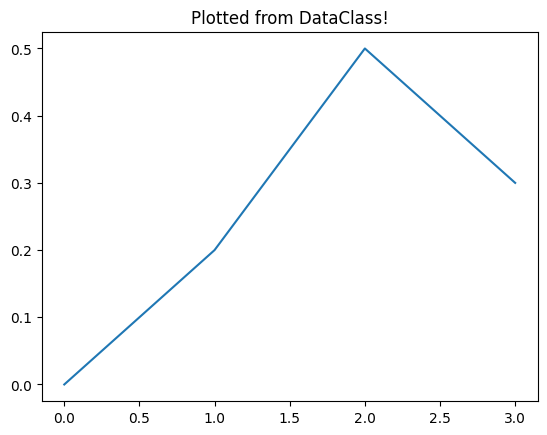

In [14]:
# supplied by downstream library:
class DataContainer:

    def __init__(self, x, y):
        """
        Proper docstring here!
        """
        self._x = x
        self._y = y

    def plot(self, ax=None, **kwargs):
        if ax is None:
            ax = plt.gca()
        ax.plot(self._x, self._y, **kwargs)
        ax.set_title('Plotted from DataClass!')
        return ax


# what the user usually calls:
data = DataContainer([0, 1, 2, 3], [0, 0.2, 0.5, 0.3])
data.plot()

- So the library can hide all the nitty-gritty from the user, and can make a visualization appropriate to the data type, often with good labels, choices of colormaps, and other convenient features.
- In the above, however, we may not have liked the title the library provided. Thankfully, they pass us back the Axes from the plot() method, and understanding the explicit Axes interface, we could call: ax.set_title('My preferred title') to customize the title.
- Many libraries also allow their plot methods to accept an optional ax argument. This allows us to place the visualization in an Axes that we have placed and perhaps customized.

#### Summary
- Overall, it is useful to understand the explicit "Axes" interface since it is the most flexible and underlies the other interfaces. A user can usually figure out how to drop down to the explicit interface and operate on the underlying objects. While the explicit interface can be a bit more verbose to setup, complicated plots will often end up simpler than trying to use the implicit "pyplot" interface.
- Note: It is sometimes confusing to people that we import pyplot for both interfaces. Currently, the pyplot module implements the "pyplot" interface, but it also provides top-level Figure and Axes creation methods, and ultimately spins up the graphical user interface, if one is being used. So pyplot is still needed regardless of the interface chosen.
- Similarly, the declarative interfaces provided by partner libraries use the objects accessible by the "Axes" interface, and often accept these as arguments or pass them back from methods. It is usually essential to use the explicit "Axes" interface to perform any customization of the default visualization, or to unpack the data into NumPy arrays and pass directly to Matplotlib.

### Interactive figures
- From https://matplotlib.org/stable/users/explain/figure/interactive.html
- Interactivity can be invaluable when exploring plots. The pan/zoom and mouse-location tools built into the Matplotlib GUI windows are often sufficient, but you can also use the event system to build customized data exploration tools.
- Matplotlib ships with backends binding to several GUI toolkits (Qt, Tk, Wx, GTK, macOS, JavaScript) and third party packages provide bindings to kivy and Jupyter Lab. For the figures to be responsive to mouse, keyboard, and paint events, the GUI event loop needs to be integrated with an interactive prompt. We recommend using IPython (see below).
- The pyplot module provides functions for explicitly creating figures that include interactive tools, a toolbar, a tool-tip, and key bindings:

#### **pyplot.figure()**
    - Creates a new empty Figure or selects an existing figure
#### **pyplot.subplots()**
    - Creates a new Figure and fills it with a grid of Axes
#### **pyplot.gcf()**
    - Get the current Figure. If there is current no figure on the pyplot figure stack, a new figure is created
#### **pyplot.gca()**
    - Get the current Axes. IF there is current no Axes on the Figure, a new one created

- Almost all of the functions in pyplot pass through the current Figure / Axes  (or create one) as appropriate.
- Matplotlib keeps a reference to all of the open figures created via pyplot.figure or pyplot.subplots so that the figures will not be garbage collected. Figures can be closed and deregistered from pyplot individually via pyplot.close; all open Figures can be closed via plt.close('all').

#### IPython integration
- We recommend using IPython for an interactive shell. In addition to all of its features (improved tab-completion, magics, multiline editing, etc), it also ensures that the GUI toolkit event loop is properly integrated with the command line.
- In this example, we create and modify a figure via an IPython prompt. The figure displays in a QtAgg GUI window. To configure the integration and enable interactive mode use 

In [15]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


- Create a new figure window:

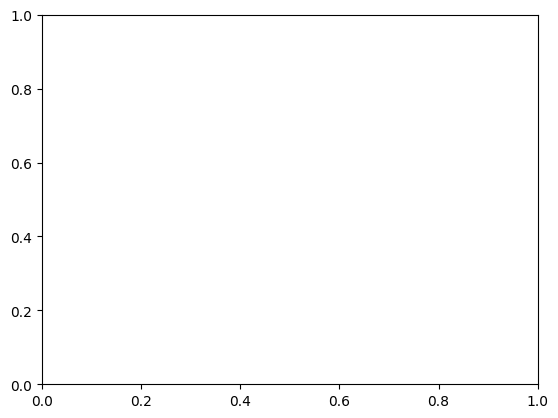

In [16]:
fig, ax = plt.subplots()

- Add a line plot of the data to the window:

In [17]:
ln, = ax.plot(range(5))

- Change the color of the line from blue to orange:

In [18]:
ln.set_color("orange")

- If you wish to disable automatic redrawing of the plot:

In [19]:
plt.ioff()

- If you wish to re-enable automatic redrawing of the plot:

In [20]:
plt.ion()

- In recent versions of Matplotlib and IPython, it is sufficient to import matplotlib.pyplot and call pyplot.ion. Using the % magic is guaranteed to work in all versions of Matplotlib and IPython.

#### Interactive mode


|       |                                      |
| --------------        | -----------------------                                        |
| pyplot.ion            | Enable interactive mode.                                       |
| pyplot.ioff           | Disable interactive mode.                                      |
| pyplot.isinteractive  | Return whether plots are updated after every plotting command. |
| pyplot.show           | Display all open figures.                                      |
| pyplot.pause          | Run the GUI event loop for interval seconds.                   |

#### Interactive mode controls:
- whether created figures are automatically shown
- whether changes to artists automatically trigger re-drawing existing figures
- when pyplot.show() returns if given no arguments: immediately, or after all of the figures have been closed

#### If in interactive mode:
- newly created figures will be displayed immediately
- figures will automatically redraw when elements are changed
- pyplot.show() displays the figures and immediately returns

#### If not in interactive mode:
- newly created figures and changes to figures are not displayed until
    - pyplot.show() is called
    - pyplot.pause() is called
    - FigureCanvasBase.flush_events() is called

- pyplot.show() runs the GUI event loop and does not return until all the plot windows are closed

- If you are in non-interactive mode (or created figures while in non-interactive mode) you may need to explicitly call pyplot.show to display the windows on your screen. If you only want to run the GUI event loop for a fixed amount of time, you can use pyplot.pause. This will block the progress of your code as if you had called time.sleep, ensure the current window is shown and re-drawn if needed, and run the GUI event loop for the specified period of time.

- The GUI event loop being integrated with your command prompt and the figures being in interactive mode are independent of each other. If you try to use pyplot.ion without arranging for the event-loop integration, your figures will appear but will not be interactive while the prompt is waiting for input. You will not be able to pan/zoom and the figure may not even render (the window might appear black, transparent, or as a snapshot of the desktop under it). Conversely, if you configure the event loop integration, displayed figures will be responsive while waiting for input at the prompt, regardless of pyplot's "interactive mode".

- No matter what combination of interactive mode setting and event loop integration, figures will be responsive if you use pyplot.show(block=True), pyplot.pause, or run the GUI main loop in some other way.

### Interactive figures and asynchronous programming
- From https://matplotlib.org/stable/users/explain/figure/interactive_guide.html
- Matplotlib supports rich interactive figures by embedding figures into a GUI window. The basic interactions of panning and zooming in an Axes to inspect your data is available out-of-the-box. This is supported by a full mouse and keyboard event handling system that you can use to build sophisticated interactive graphs.

- This guide is meant to be an introduction to the low-level details of how Matplotlib integration with a GUI event loop works. 

#### GUI events
- All GUI frameworks (Qt, Wx, Gtk, Tk, macOS, or web) have some method of capturing user interactions and passing them back to the application, but the exact details depend on the toolkit (for example callbacks in Tk or the Signal / Slot framework in Qt). The Matplotlib backends encapsulate the details of the GUI frameworks and provide a framework-independent interface to GUI events through Matplotlib's event handling system. By connecting functions to the event handling system (see FigureCanvasBase.mpl_connect), you can interactively respond to user actions in a GUI toolkit agnostic way.

#### Event loops
- Fundamentally, all user interaction (and networking) is implemented as an infinite loop waiting for events from the user (via the OS) and then doing something about it. For example, a minimal Read Evaluate Print Loop (REPL) is:
```python
exec_count = 0
while True:
    inp = input(f"[{exec_count}] > ")        # Read
    ret = eval(inp)                          # Evaluate
    print(ret)                               # Print
    exec_count += 1                          # Loop
```

- This is missing many niceties (for example, it exits on the first exception!), but is representative of the event loops that underlie all terminals, GUIs, and servers [1]. In general the Read step is waiting on some sort of I/O -- be it user input or the network -- while the Evaluate and Print are responsible for interpreting the input and then doing something about it.

- In practice we interact with a framework that provides a mechanism to register callbacks to be run in response to specific events rather than directly implement the I/O loop. For example "when the user clicks on this button, please run this function" or "when the user hits the 'z' key, please run this other function". This allows users to write reactive, event-driven, programs without having to delve into the nitty-gritty details of I/O. The core event loop is sometimes referred to as "the main loop" and is typically started, depending on the library, by methods with names like exec, run, or start.

#### Command prompt integration
- So far, so good. We have the REPL (like the IPython terminal) that lets us interactively send code to the interpreter and get results back. We also have the GUI toolkit that runs an event loop waiting for user input and lets us register functions to be run when that happens. However, if we want to do both we have a problem: the prompt and the GUI event loop are both infinite loops and cannot run in parallel. In order for both the prompt and the GUI windows to be responsive we need a method to allow the loops to "timeshare" :

- Blocking the prompt: let the GUI main loop block the python process when you want interactive windows
- Input hook integration: let the CLI main loop block the python process and intermittently run the GUI loop
- Full embedding: fully embed python in the GUI (but this is basically writing a full application)

#### Blocking the prompt

| | |
| ------------- | -------------- |
| pyplot.show                                       | Display all open figures.                     |
| pyplot.pause                                      | Run the GUI event loop for interval seconds.  |
| backend_bases.FigureCanvasBase.start_event_loop   | Start a blocking event loop.                  |
| backend_bases.FigureCanvasBase.stop_event_loop    | Stop the current blocking event loop.         |

- The simplest solution is to start the GUI event loop and let it run exclusively, which results in responsive figure windows. However, the CLI event loop will not run, so that you cannot enter new commands. We call this "blocking" mode. (Your terminal may echo the typed characters, but they will not yet be processed by the CLI event loop because the Python interpreter is busy running the GUI event loop).
- It is possible to stop the GUI event loop and return control to the CLI event loop. You can then use the prompt again, but any still open figure windows are non-responsive. Re-starting the GUI event loop will make these figure responsive again (and will process any queued up user interaction).
- The typical command to show all figures and run the GUI event loop exclusively until all figures are closed is:
```
plt.show()
```
- Alternatively, you can start the GUI event loop for a fixed amount of time using pyplot.pause.

- If you are not using pyplot you can start and stop the event loops via FigureCanvasBase.start_event_loop and FigureCanvasBase.stop_event_loop. However, in most contexts where you would not be using pyplot you are embedding Matplotlib in a large GUI application and the GUI event loop should already be running for the application.

- Away from the prompt, this technique can be very useful if you want to write a script that pauses for user interaction, or displays a figure between polling for additional data. See Scripts and functions for more details.

#### Input hook integration

- While running the GUI event loop in a blocking mode or explicitly handling UI events is useful, we can do better! We really want to be able to have a usable prompt and interactive figure windows.

- We can do this using the "input hook" feature of the interactive prompt. This hook is called by the prompt as it waits for the user to type (even for a fast typist the prompt is mostly waiting for the human to think and move their fingers). Although the details vary between prompts the logic is roughly

    - start to wait for keyboard input
    - start the GUI event loop
    - as soon as the user hits a key, exit the GUI event loop and handle the key
    - repeat

- This gives us the illusion of simultaneously having interactive GUI windows and an interactive prompt. Most of the time the GUI event loop is running, but as soon as the user starts typing the prompt takes over again.

- This time-share technique only allows the event loop to run while python is otherwise idle and waiting for user input. If you want the GUI to be responsive during long running code it is necessary to periodically flush the GUI event queue as described in Explicitly spinning the event loop. In this case it is your code, not the REPL, which is blocking the process so you need to handle the "time-share" manually. Conversely, a very slow figure draw will block the prompt until it finishes drawing.

#### Full embedding
- It is also possible to go the other direction and fully embed figures (and a Python interpreter) in a rich native application. Matplotlib provides classes for each toolkit which can be directly embedded in GUI applications (this is how the built-in windows are implemented!). 

#### Scripts and functions
| | |
| -------------------- | ---------------------- |
| backend_bases.FigureCanvasBase.flush_events | Flush the GUI events for the figure. |
| backend_bases.FigureCanvasBase.draw_idle | Request a widget redraw once control returns to the GUI event loop. |
| figure.Figure.ginput | Blocking call to interact with a figure. |
| pyplot.ginput | Blocking call to interact with a figure. |
| pyplot.show | Display all open figures. |
| pyplot.pause | Run the GUI event loop for interval seconds. |

- There are several use-cases for using interactive figures in scripts:
    - capture user input to steer the script
    - progress updates as a long running script progresses
    - streaming updates from a data source

#### Blocking functions

- If you only need to collect points in an Axes you can use Figure.ginput. However if you have written some custom event handling or are using widgets you will need to manually run the GUI event loop using the methods described above.

- You can also use the methods described in Blocking the prompt to suspend run the GUI event loop. Once the loop exits your code will resume. In general, any place you would use time.sleep you can use pyplot.pause instead with the added benefit of interactive figures.

- For example, if you want to poll for data you could use something like:
```python
fig, ax = plt.subplots()
ln, = ax.plot([], [])

while True:
    x, y = get_new_data()
    ln.set_data(x, y)
    plt.pause(1)
```
- which would poll for new data and update the figure at 1Hz.


#### Explicitly spinning the event loop

| | |
| ----------------------------- | ---------------------- |
| backend_bases.FigureCanvasBase.flush_events | Flush the GUI events for the figure. |
| backend_bases.FigureCanvasBase.draw_idle | Request a widget redraw once control returns to the GUI event loop.| 

- If you have open windows that have pending UI events (mouse clicks, button presses, or draws) you can explicitly process those events by calling FigureCanvasBase.flush_events. This will run the GUI event loop until all UI events currently waiting have been processed. The exact behavior is backend-dependent but typically events on all figure are processed and only events waiting to be processed (not those added during processing) will be handled.

- For example:

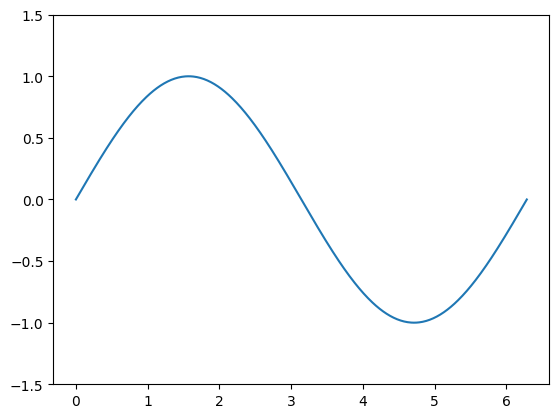

In [22]:
import time
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

fig, ax = plt.subplots()
th = np.linspace(0, 2*np.pi, 512)
ax.set_ylim(-1.5, 1.5)

ln, = ax.plot(th, np.sin(th))

def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        ln.figure.canvas.flush_events()

slow_loop(100, ln)

- While this will feel a bit laggy (as we are only processing user input every 100ms whereas 20-30ms is what feels "responsive") it will respond.

- If you make changes to the plot and want it re-rendered you will need to call draw_idle to request that the canvas be re-drawn. This method can be thought of draw_soon in analogy to asyncio.loop.call_soon.

- We can add this to our example above as:
```python
def slow_loop(N, ln):
    for j in range(N):
        time.sleep(.1)  # to simulate some work
        if j % 10:
            ln.set_ydata(np.sin(((j // 10) % 5 * th)))
            ln.figure.canvas.draw_idle()

        ln.figure.canvas.flush_events()

slow_loop(100, ln)
```
- The more frequently you call FigureCanvasBase.flush_events the more responsive your figure will feel but at the cost of spending more resources on the visualization and less on your computation.

#### Stale artists
- Artists (as of Matplotlib 1.5) have a stale attribute which is True if the internal state of the artist has changed since the last time it was rendered. By default the stale state is propagated up to the Artists parents in the draw tree, e.g., if the color of a Line2D instance is changed, the Axes and Figure that contain it will also be marked as "stale". Thus, fig.stale will report if any artist in the figure has been modified and is out of sync with what is displayed on the screen. This is intended to be used to determine if draw_idle should be called to schedule a re-rendering of the figure.

- Each artist has a Artist.stale_callback attribute which holds a callback with the signature
```python
def callback(self: Artist, val: bool) -> None:
    ...
```

- which by default is set to a function that forwards the stale state to the artist's parent. If you wish to suppress a given artist from propagating set this attribute to None.

- Figure instances do not have a containing artist and their default callback is None. If you call pyplot.ion and are not in IPython we will install a callback to invoke draw_idle whenever the Figure becomes stale. In IPython we use the 'post_execute' hook to invoke draw_idle on any stale figures after having executed the user's input, but before returning the prompt to the user. If you are not using pyplot you can use the callback Figure.stale_callback attribute to be notified when a figure has become stale.

#### Idle draw
| | |
| ----------------- | ------------------- |
| backend_bases.FigureCanvasBase.draw           | Render the Figure.                                                    |
| backend_bases.FigureCanvasBase.draw_idle      | Request a widget redraw once control returns to the GUI event loop.   |
| backend_bases.FigureCanvasBase.flush_events   | Flush the GUI events for the figure.                                  |

- In almost all cases, we recommend using backend_bases.FigureCanvasBase.draw_idle over backend_bases.FigureCanvasBase.draw. draw forces a rendering of the figure whereas draw_idle schedules a rendering the next time the GUI window is going to re-paint the screen. This improves performance by only rendering pixels that will be shown on the screen. If you want to be sure that the screen is updated as soon as possible do

```python
fig.canvas.draw_idle()
fig.canvas.flush_events()
```

#### Threading
- Most GUI frameworks require that all updates to the screen, and hence their main event loop, run on the main thread. This makes pushing periodic updates of a plot to a background thread impossible. Although it seems backwards, it is typically easier to push your computations to a background thread and periodically update the figure on the main thread.

In general Matplotlib is not thread safe. If you are going to update Artist objects in one thread and draw from another you should make sure that you are locking in the critical sections.

### Event loop integration mechanism

#### CPython /readline
- The Python C API provides a hook, PyOS_InputHook, to register a function to be run ("The function will be called when Python's interpreter prompt is about to become idle and wait for user input from the terminal."). This hook can be used to integrate a second event loop (the GUI event loop) with the python input prompt loop. The hook functions typically exhaust all pending events on the GUI event queue, run the main loop for a short fixed amount of time, or run the event loop until a key is pressed on stdin.
- Matplotlib does not currently do any management of PyOS_InputHook due to the wide range of ways that Matplotlib is used. This management is left to downstream libraries -- either user code or the shell. Interactive figures, even with Matplotlib in "interactive mode", may not work in the vanilla python repl if an appropriate PyOS_InputHook is not registered.
- Input hooks, and helpers to install them, are usually included with the python bindings for GUI toolkits and may be registered on import. IPython also ships input hook functions for all of the GUI frameworks Matplotlib supports which can be installed via %matplotlib. This is the recommended method of integrating Matplotlib and a prompt.


### Event handling and picking
- from https://matplotlib.org/stable/users/explain/figure/event_handling.html
- Matplotlib works with a number of user interface toolkits (wxpython, tkinter, qt, gtk, and macOS) and in order to support features like interactive panning and zooming of figures, it is helpful to the developers to have an API for interacting with the figure via key presses and mouse movements that is "GUI neutral" so we don't have to repeat a lot of code across the different user interfaces. Although the event handling API is GUI neutral, it is based on the GTK model, which was the first user interface Matplotlib supported. The events that are triggered are also a bit richer vis-a-vis Matplotlib than standard GUI events, including information like which Axes the event occurred in. The events also understand the Matplotlib coordinate system, and report event locations in both pixel and data coordinates.

#### Event connections
- To receive events, you need to write a callback function and then connect your function to the event manager, which is part of the FigureCanvasBase. Here is a simple example that prints the location of the mouse click and which button was pressed:

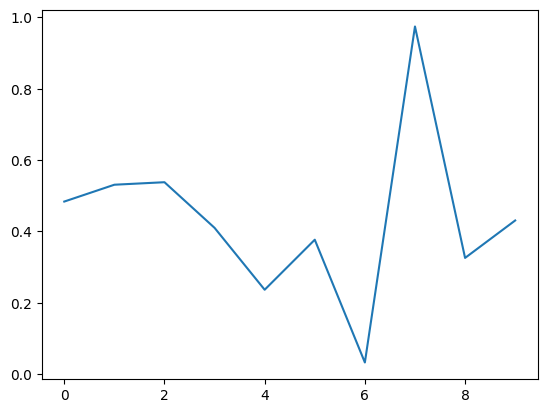

In [23]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

- The **FigureCanvasBase.mpl_connect** method returns a connection id (an integer), which can be used to disconnect the callback via
```python
fig.canvas.mpl_disconnect(cid)
```

- **Note**: The canvas retains only weak references to instance methods used as callbacks. Therefore, you need to retain a reference to instances owning such methods. Otherwise the instance will be garbage-collected and the callback will vanish. This does not affect free functions used as callbacks.

- Here are the events that you can connect to, the class instances that are sent back to you when the event occurs, and the event descriptions:

| Event name | Class | Description | 
| ---------- | -------- | --------- |
| 'button_press_event' | MouseEvent | mouse button is pressed |
| 'button_release_event' | MouseEvent | mouse button is released |
| 'close_event' | CloseEvent | figure is closed |
| 'draw_event' | DrawEvent | canvas has been drawn (but screen widget not updated yet) |
| 'key_press_event' | KeyEvent | key is pressed |
| 'key_release_event' | KeyEvent | key is released |
| 'motion_notify_event' | MouseEvent | mouse moves |
| 'pick_event' | PickEvent | artist in the canvas is selected |
| 'resize_event' | ResizeEvent | figure canvas is resized |
| 'scroll_event' | MouseEvent | mouse scroll wheel is rolled |
| 'figure_enter_event' | LocationEvent | mouse enters a new figure |
| 'figure_leave_event' | LocationEvent | mouse leaves a figure |
| 'axes_enter_event' | LocationEvent | mouse enters a new axes |
| 'axes_leave_event' | LocationEvent | mouse leaves an axes |

- **Note**: When connecting to 'key_press_event' and 'key_release_event' events, you may encounter inconsistencies between the different user interface toolkits that Matplotlib works with. This is due to inconsistencies/limitations of the user interface toolkit. The following table shows some basic examples of what you may expect to receive as key(s) (using a QWERTY keyboard layout) from the different user interface toolkits, where a comma separates different keys:
- Matplotlib attaches some keypress callbacks by default for interactivity; they are documented in the Navigation keyboard shortcuts section.

#### Event attributes
- All Matplotlib events inherit from the base class matplotlib.backend_bases.Event, which stores the attributes:

- **name**
    - the event name

- **canvas**
    - the FigureCanvas instance generating the event

- **guiEvent**
    - the GUI event that triggered the Matplotlib event

- The most common events that are the bread and butter of event handling are key press/release events and mouse press/release and movement events. The KeyEvent and MouseEvent classes that handle these events are both derived from the LocationEvent, which has the following attributes

- **x, y**
    - mouse x and y position in pixels from left and bottom of canvas

- **inaxes**
    - the Axes instance over which the mouse is, if any; else None

- **xdata, ydata**
    - mouse x and y position in data coordinates, if the mouse is over an axes

- Let's look a simple example of a canvas, where a simple line segment is created every time a mouse is pressed:

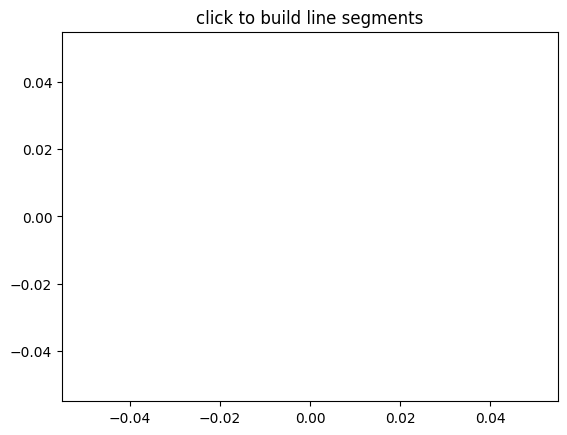

In [ ]:
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes != self.line.axes:
            return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig, ax = plt.subplots()
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()
# Doesn't not work in jupyter notebook

- The MouseEvent that we just used is a LocationEvent, so we have access to the data and pixel coordinates via (event.x, event.y) and (event.xdata, event.ydata). In addition to the LocationEvent attributes, it also has:
- **button**
    - the button pressed: None, MouseButton, 'up', or 'down' (up and down are used for scroll events)
- **key**
    - the key pressed: None, any character, 'shift', 'win', or 'control'

#### Draggable rectangle exercise
- Write a draggable rectangle class that is initialized with a Rectangle instance but will move its xy location when dragged.
- Hint: You will need to store the original xy location of the rectangle which is stored as rect.xy and connect to the press, motion and release mouse events. When the mouse is pressed, check to see if the click occurs over your rectangle (see Rectangle.contains) and if it does, store the rectangle xy and the location of the mouse click in data coordinates. In the motion event callback, compute the deltax and deltay of the mouse movement, and add those deltas to the origin of the rectangle you stored, then redraw the figure. On the button release event, just reset all the button press data you stored as None.
- Here is the solution:

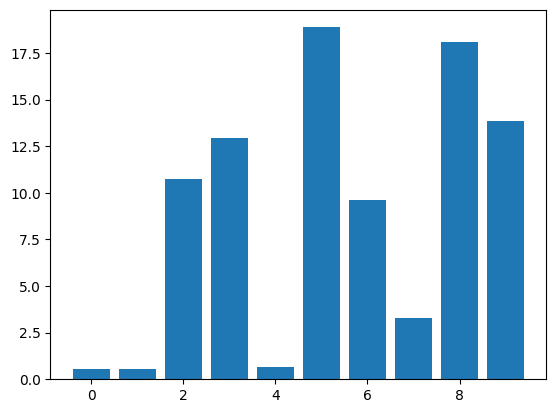

In [25]:
class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        """Connect to all the events we need."""
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        """Check whether mouse is over us; if so, store some data."""
        if event.inaxes != self.rect.axes:
            return
        contains, attrd = self.rect.contains(event)
        if not contains:
            return
        print('event contains', self.rect.xy)
        self.press = self.rect.xy, (event.xdata, event.ydata)

    def on_motion(self, event):
        """Move the rectangle if the mouse is over us."""
        if self.press is None or event.inaxes != self.rect.axes:
            return
        (x0, y0), (xpress, ypress) = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        # print(f'x0={x0}, xpress={xpress}, event.xdata={event.xdata}, '
        #       f'dx={dx}, x0+dx={x0+dx}')
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        self.rect.figure.canvas.draw()

    def on_release(self, event):
        """Clear button press information."""
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        """Disconnect all callbacks."""
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig, ax = plt.subplots()
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

- Extra credit: Use blitting to make the animated drawing faster and smoother.

- Extra credit solution:

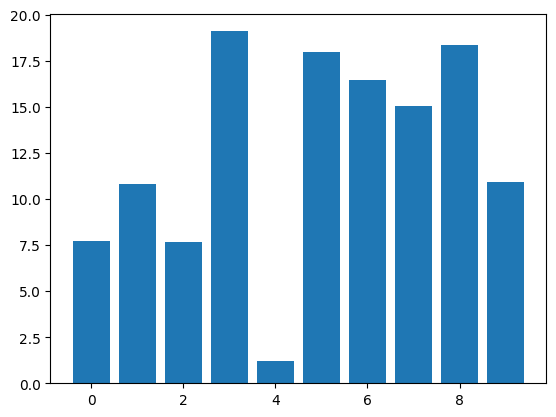

In [26]:
class DraggableRectangle:
    lock = None  # only one can be animated at a time

    def __init__(self, rect):
        self.rect = rect
        self.press = None
        self.background = None

    def connect(self):
        """Connect to all the events we need."""
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        """Check whether mouse is over us; if so, store some data."""
        if (event.inaxes != self.rect.axes
                or DraggableRectangle.lock is not None):
            return
        contains, attrd = self.rect.contains(event)
        if not contains:
            return
        print('event contains', self.rect.xy)
        self.press = self.rect.xy, (event.xdata, event.ydata)
        DraggableRectangle.lock = self

        # draw everything but the selected rectangle and store the pixel buffer
        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        self.rect.set_animated(True)
        canvas.draw()
        self.background = canvas.copy_from_bbox(self.rect.axes.bbox)

        # now redraw just the rectangle
        axes.draw_artist(self.rect)

        # and blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_motion(self, event):
        """Move the rectangle if the mouse is over us."""
        if (event.inaxes != self.rect.axes
                or DraggableRectangle.lock is not self):
            return
        (x0, y0), (xpress, ypress) = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        # restore the background region
        canvas.restore_region(self.background)

        # redraw just the current rectangle
        axes.draw_artist(self.rect)

        # blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_release(self, event):
        """Clear button press information."""
        if DraggableRectangle.lock is not self:
            return

        self.press = None
        DraggableRectangle.lock = None

        # turn off the rect animation property and reset the background
        self.rect.set_animated(False)
        self.background = None

        # redraw the full figure
        self.rect.figure.canvas.draw()

    def disconnect(self):
        """Disconnect all callbacks."""
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig, ax = plt.subplots()
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

#### Mouse enter and leave
- If you want to be notified when the mouse enters or leaves a figure or axes, you can connect to the figure/axes enter/leave events. Here is a simple example that changes the colors of the axes and figure background that the mouse is over:

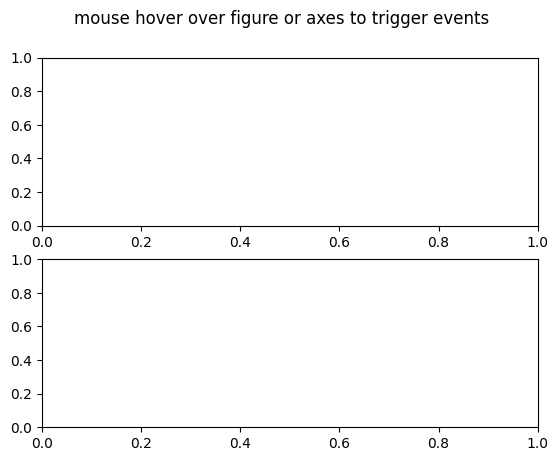

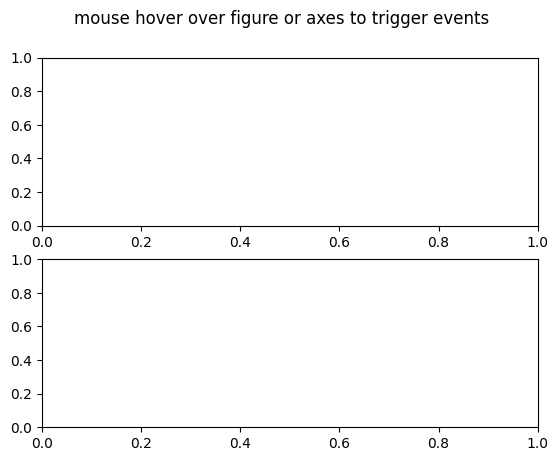

In [27]:
def enter_axes(event):
    print('enter_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('yellow')
    event.canvas.draw()

def leave_axes(event):
    print('leave_axes', event.inaxes)
    event.inaxes.patch.set_facecolor('white')
    event.canvas.draw()

def enter_figure(event):
    print('enter_figure', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('red')
    event.canvas.draw()

def leave_figure(event):
    print('leave_figure', event.canvas.figure)
    event.canvas.figure.patch.set_facecolor('grey')
    event.canvas.draw()

fig1, axs = plt.subplots(2)
fig1.suptitle('mouse hover over figure or axes to trigger events')

fig1.canvas.mpl_connect('figure_enter_event', enter_figure)
fig1.canvas.mpl_connect('figure_leave_event', leave_figure)
fig1.canvas.mpl_connect('axes_enter_event', enter_axes)
fig1.canvas.mpl_connect('axes_leave_event', leave_axes)

fig2, axs = plt.subplots(2)
fig2.suptitle('mouse hover over figure or axes to trigger events')

fig2.canvas.mpl_connect('figure_enter_event', enter_figure)
fig2.canvas.mpl_connect('figure_leave_event', leave_figure)
fig2.canvas.mpl_connect('axes_enter_event', enter_axes)
fig2.canvas.mpl_connect('axes_leave_event', leave_axes)

plt.show()

#### Object picking
- You can enable picking by setting the picker property of an Artist (such as Line2D, Text, Patch, Polygon, AxesImage, etc.)
- The picker property can be set using various types:

- **None**
    - Picking is disabled for this artist (default).
- **boolean**
    - If True, then picking will be enabled and the artist will fire a pick event if the mouse event is over the artist.
- **callable**
    - If picker is a callable, it is a user supplied function which determines whether the artist is hit by the mouse event. The signature is hit, props = picker(artist, mouseevent) to determine the hit test. If the mouse event is over the artist, return hit = True; props is a dictionary of properties that become additional attributes on the PickEvent.

- The artist's pickradius property can additionally be set to a tolerance value in points (there are 72 points per inch) that determines how far the mouse can be and still trigger a mouse event.

- After you have enabled an artist for picking by setting the picker property, you need to connect a handler to the figure canvas pick_event to get pick callbacks on mouse press events. The handler typically looks like

In [28]:
def pick_handler(event):
    mouseevent = event.mouseevent
    artist = event.artist
    # now do something with this...

- The PickEvent passed to your callback always has the following attributes:

- **mouseevent**
- The MouseEvent that generate the pick event. See event-attributes for a list of useful attributes on the mouse event.
- **artist**
- The Artist that generated the pick event.

- Additionally, certain artists like Line2D and PatchCollection may attach additional metadata, like the indices of the data that meet the picker criteria (e.g., all the points in the line that are within the specified pickradius tolerance).

#### Simple picking example
- In the example below, we enable picking on the line and set a pick radius tolerance in points. The onpick callback function will be called when the pick event it within the tolerance distance from the line, and has the indices of the data vertices that are within the pick distance tolerance. Our onpick callback function simply prints the data that are under the pick location. Different Matplotlib Artists can attach different data to the PickEvent. For example, Line2D attaches the ind property, which are the indices into the line data under the pick point. See Line2D.pick for details on the PickEvent properties of the line.

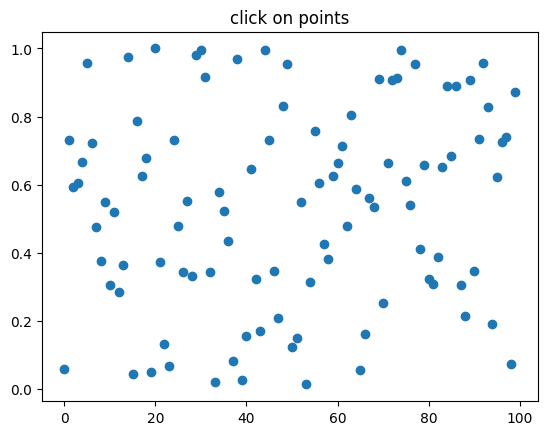

In [29]:
fig, ax = plt.subplots()
ax.set_title('click on points')

line, = ax.plot(np.random.rand(100), 'o',
                picker=True, pickradius=5)  # 5 points tolerance

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
    print('onpick points:', points)

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

#### Picking exercise
- Create a data set of 100 arrays of 1000 Gaussian random numbers and compute the sample mean and standard deviation of each of them (hint: NumPy arrays have a mean and std method) and make a xy marker plot of the 100 means vs. the 100 standard deviations. Connect the line created by the plot command to the pick event, and plot the original time series of the data that generated the clicked on points. If more than one point is within the tolerance of the clicked on point, you can use multiple subplots to plot the multiple time series.

- Exercise solution:

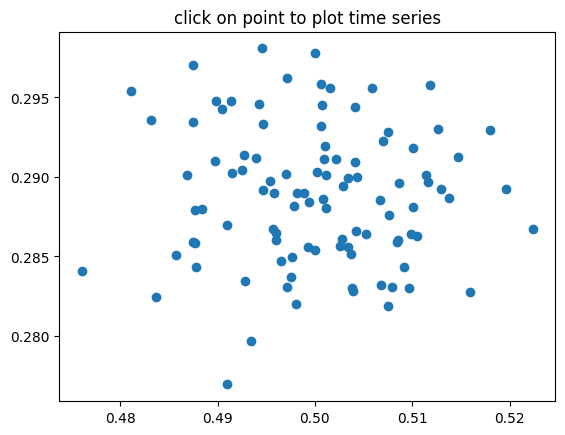

In [30]:
"""
Compute the mean and stddev of 100 data sets and plot mean vs. stddev.
When you click on one of the (mean, stddev) points, plot the raw dataset
that generated that point.
"""

import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig, ax = plt.subplots()
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=True, pickradius=5)  # 5 points tolerance


def onpick(event):
    if event.artist != line:
        return
    n = len(event.ind)
    if not n:
        return
    fig, axs = plt.subplots(n, squeeze=False)
    for dataind, ax in zip(event.ind, axs.flat):
        ax.plot(X[dataind])
        ax.text(0.05, 0.9,
                f"$\\mu$={xs[dataind]:1.3f}\n$\\sigma$={ys[dataind]:1.3f}",
                transform=ax.transAxes, verticalalignment='top')
        ax.set_ylim(-0.5, 1.5)
    fig.show()
    return True


fig.canvas.mpl_connect('pick_event', onpick)
plt.show()

### Writing a backend -- the pyplot interface
- From https://matplotlib.org/stable/users/explain/figure/writing_a_backend_pyplot_interface.html
- This page assumes general understanding of the information in the Backends page, and is instead intended as reference for third-party backend implementers. It also only deals with the interaction between backends and pyplot, not with the rendering side, which is described in backend_template.

- There are two APIs for defining backends: a new canvas-based API (introduced in Matplotlib 3.6), and an older function-based API. The new API is simpler to implement because many methods can be inherited from "parent backends". It is recommended if back-compatibility for Matplotlib < 3.6 is not a concern. However, the old API remains supported.

- Fundamentally, a backend module needs to provide information to pyplot, so that
    - **pyplot.figure()** can create a new Figure instance and associate it with an instance of a backend-provided canvas class, itself hosted in an instance of a backend-provided manager class.
    - **pyplot.show()** can show all figures and start the GUI event loop (if any).

- To do so, the backend module must define a backend_module.FigureCanvas subclass of FigureCanvasBase. In the canvas-based API, this is the only strict requirement for backend modules. The function-based API additionally requires many module-level functions to be defined.

#### Canvas-based API (Matplotlib >= 3.6)
- Creating a figure: **pyplot.figure()** calls figure = Figure(); FigureCanvas.new_manager(figure, num) (new_manager is a classmethod) to instantiate a canvas and a manager and set up the figure.canvas and figure.canvas.manager attributes. Figure unpickling uses the same approach, but replaces the newly instantiated Figure() by the unpickled figure Interactive backends should customize the effect of new_manager by setting the FigureCanvas.manager_class attribute to the desired manager class, and additionally (if the canvas cannot be created before the manager, as in the case of the wx backends) by overriding the FigureManager.create_with_canvas classmethod. (Non-interactive backends can normally use a trivial FigureManagerBase and can therefore skip this step.) After a new figure is registered with pyplot (either via **pyplot.figure()** or via unpickling), if in interactive mode, pyplot will call its canvas' **draw_idle()** method, which can be overridden as desired.

- Showing figures: **pyplot.show()** calls FigureCanvas.manager_class.pyplot_show() (a classmethod), forwarding any arguments, to start the main event loop. By default, **pyplot_show()** checks whether there are any managers registered with pyplot (exiting early if not), calls **manager.show()** on all such managers, and then, if called with block=True (or with the default block=None and out of IPython's pylab mode and not in interactive mode), calls FigureCanvas.manager_class.start_main_loop() (a classmethod) to start the main event loop. Interactive backends should therefore override the FigureCanvas.manager_class.start_main_loop classmethod accordingly (or alternatively, they may also directly override FigureCanvas.manager_class.pyplot_show directly).

#### Function-based API
- Creating a figure: **pyplot.figure()** calls new_figure_manager(num, *args, **kwargs) (which also takes care of creating the new figure as Figure(*args, **kwargs)); unpickling calls new_figure_manager_given_figure(num, figure). Furthermore, in interactive mode, the first draw of the newly registered figure can be customized by providing a module-level draw_if_interactive() function. (In the new canvas-based API, this function is not taken into account anymore.)

- Showing figures: **pyplot.show()** calls a module-level show() function, which is typically generated via the ShowBase class and its mainloop method.

#### Registering a backend
- For a new backend to be usable via matplotlib.use() or IPython %matplotlib magic command, it must be compatible with one of the three ways supported by the BackendRegistry:

#### Built-in
- A backend built into Matplotlib must have its name and FigureCanvas.required_interactive_framework hard-coded in the BackendRegistry. If the backend module is not f"matplotlib.backends.backend_{backend_name.lower()}" then there must also be an entry in the BackendRegistry._name_to_module.

#### module:// syntax
- Any backend in a separate module (not built into Matplotlib) can be used by specifying the path to the module in the form module://some.backend.module. An example is module://mplcairo.qt for mplcairo. The backend's interactive framework will be taken from its FigureCanvas.required_interactive_framework.

#### Entry point
- An external backend module can self-register as a backend using an entry point in its pyproject.toml such as the one used by matplotlib-inline:
```
[project.entry-points."matplotlib.backend"]
inline = "matplotlib_inline.backend_inline"
```
- The backend's interactive framework will be taken from its FigureCanvas.required_interactive_framework. All entry points are loaded together but only when first needed, such as when a backend name is not recognised as a built-in backend, or when list_all() is first called.


## Axes and subplots
- From https://matplotlib.org/stable/users/explain/axes/index.html
- Matplotlib Axes are the gateway to creating your data visualizations. Once an Axes is placed on a figure there are many methods that can be used to add data to the Axes. An Axes typically has a pair of Axis Artists that define the data coordinate system, and include methods to add annotations like x- and y-labels, titles, and legends.

### Introduction to Axes (or Subplots)
- From https://matplotlib.org/stable/users/explain/axes/axes_intro.html
- Matplotlib Axes are the gateway to creating your data visualizations. Once an Axes is placed on a figure there are many methods that can be used to add data to the Axes. An Axes typically has a pair of Axis Artists that define the data coordinate system, and include methods to add annotations like x- and y-labels, titles, and legends.
- the Axes object was created with ax = fig.subplots(). Everything else on the figure was created with methods on this ax object, or can be accessed from it. If we want to change the label on the x-axis, we call ax.set_xlabel('New Label'), if we want to plot some data we call ax.plot(x, y). Indeed, in the figure above, the only Artist that is not part of the Axes is the Figure itself, so the axes.Axes class is really the gateway to much of Matplotlib's functionality.

- **Note**: that Axes are so fundamental to the operation of Matplotlib that a lot of material here is duplicate of that in Quick start guide.

#### Creating Axes

Text(0.5, 0.98, 'plt.subplots()')

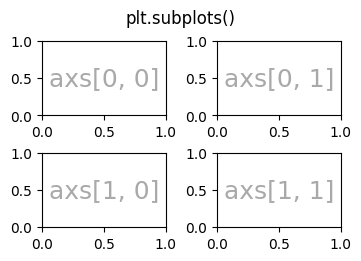

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
                        layout="constrained")
# for each Axes, add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                            transform=axs[row, col].transAxes,
                            ha='center', va='center', fontsize=18,
                            color='darkgrey')
fig.suptitle('plt.subplots()')

- Axes are added using methods on Figure objects, or via the pyplot interface. These methods are discussed in more detail in Creating Figures and Arranging multiple Axes in a Figure. However, for instance add_axes will manually position an Axes on the page. In the example above subplots put a grid of subplots on the figure, and axs is a (2, 2) array of Axes, each of which can have data added to them.

- There are a number of other methods for adding Axes to a Figure:
    - **Figure.add_axes**: manually position an Axes. fig.add_axes([0, 0, 1, 1]) makes an Axes that fills the whole figure.
    - **pyplot.subplots** and **Figure.subplots**: add a grid of Axes as in the example above. The pyplot version returns both the Figure object and an array of Axes. Note that fig, ax = **plt.subplots()** adds a single Axes to a Figure.
    - **pyplot.subplot_mosaic** and **Figure.subplot_mosaic**: add a grid of named Axes and return a dictionary of axes. For fig, axs = plt.subplot_mosaic([['left', 'right'], ['bottom', 'bottom']]), axs['left'] is an Axes in the top row on the left, and axs['bottom'] is an Axes that spans both columns on the bottom.

- See Arranging multiple Axes in a Figure for more detail on how to arrange grids of Axes on a Figure.

#### Axes plotting methods
Most of the high-level plotting methods are accessed from the axes.Axes class. See the API documentation for a full curated list, and Plot types for examples. A basic example is **axes.Axes.plot:**

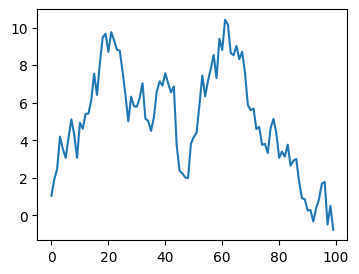

In [33]:
fig, ax = plt.subplots(figsize=(4, 3))
np.random.seed(19680801)
t = np.arange(100)
x = np.cumsum(np.random.randn(100))
lines = ax.plot(t, x)

- **Note** that plot returns a list of lines Artists which can subsequently be manipulated, as discussed in Introduction to Artists.

- A very incomplete list of plotting methods is below. Again, see Plot types for more examples, and axes.Axes for the full list of methods.

| Types | graphs |
| --- | --- |
| Pairwise data | plot, scatter, bar, step, |
| Array objects | pcolormesh, contour, quiver, streamplot, imshow |
| Statistical distributions | hist, errorbar, hist2d, pie, boxplot, violinplot |
| Irregularly gridded data | tricontour, tripcolor |

#### Axes labelling and annotation
- Usually we want to label the Axes with an xlabel, ylabel, and title, and often we want to have a legend to differentiate plot elements. The Axes class has a number of methods to create these annotations.

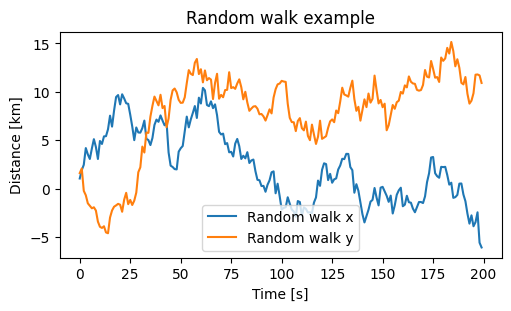

In [34]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
y = np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x, label='Random walk x')
linesy = ax.plot(t, y, label='Random walk y')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Distance [km]')
ax.set_title('Random walk example')
ax.legend()

- These methods are relatively straight-forward, though there are a number of Text properties and layout that can be set on the text objects, like fontsize, fontname, horizontalalignment. Legends can be much more complicated; see Legend guide for more details.

- **Note** that text can also be added to axes using text, and annotate. This can be quite sophisticated: see Text properties and layout and Annotations for more information.

#### Axes limits, scales, and ticking
- Each Axes has two (or more) Axis objects, that can be accessed via xaxis and yaxis properties. These have substantial number of methods on them, and for highly customizable Axis-es it is useful to read the API at Axis. However, the Axes class offers a number of helpers for the most common of these methods. Indeed, the set_xlabel, discussed above, is a helper for the set_label_text.

- Other important methods set the extent on the axes (set_xlim, set_ylim), or more fundamentally the scale of the axes. So for instance, we can make an Axis have a logarithmic scale, and zoom in on a sub-portion of the data:

(20.0, 180.0)

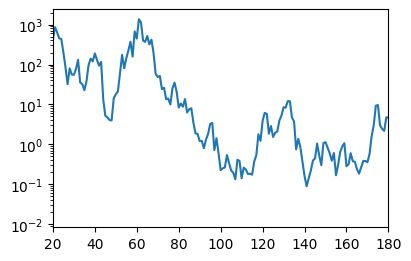

In [35]:
fig, ax = plt.subplots(figsize=(4, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = 2**np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x)
ax.set_yscale('log')
ax.set_xlim([20, 180])

- The Axes class also has helpers to deal with Axis ticks and their labels. Most straight-forward is set_xticks and set_yticks which manually set the tick locations and optionally their labels. Minor ticks can be toggled with minorticks_on or minorticks_off.

- Many aspects of Axes ticks and tick labeling can be adjusted using tick_params. For instance, to label the top of the axes instead of the bottom,color the ticks red, and color the ticklabels green:

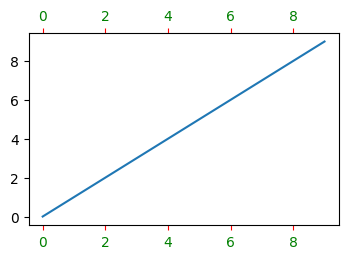

In [36]:
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(np.arange(10))
ax.tick_params(top=True, labeltop=True, color='red', axis='x',
               labelcolor='green')

- More fine-grained control on ticks, setting scales, and controlling the Axis can be highly customized beyond these Axes-level helpers.

#### Axes layout
- Sometimes it is important to set the aspect ratio of a plot in data space, which we can do with set_aspect:

Text(0.5, 1.0, 'aspect=3')

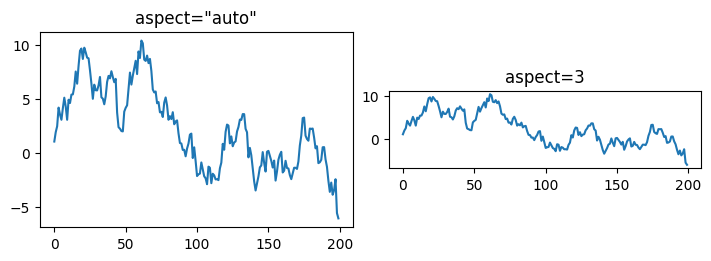

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(7, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
axs[0].plot(t, x)
axs[0].set_title('aspect="auto"')

axs[1].plot(t, x)
axs[1].set_aspect(3)
axs[1].set_title('aspect=3')

### Arranging multiple Axes in a Figure
- From https://matplotlib.org/stable/users/explain/axes/arranging_axes.html
- Often more than one Axes is wanted on a figure at a time, usually organized into a regular grid. Matplotlib has a variety of tools for working with grids of Axes that have evolved over the history of the library. Here we will discuss the tools we think users should use most often, the tools that underpin how Axes are organized, and mention some of the older tools.
- **Note**: Matplotlib uses Axes to refer to the drawing area that contains data, x- and y-axis, ticks, labels, title, etc. See Parts of a Figure for more details. Another term that is often used is "subplot", which refers to an Axes that is in a grid with other Axes objects.

#### Overview
#### Create grid-shaped combinations of Axes
- **subplots**
    - The primary function used to create figures and a grid of Axes. It creates and places all Axes on the figure at once, and returns an object array with handles for the Axes in the grid. See Figure.subplots.

or

- **subplot_mosaic**
    - A simple way to create figures and a grid of Axes, with the added flexibility that Axes can also span rows or columns. The Axes are returned in a labelled dictionary instead of an array. See also Figure.subplot_mosaic and Complex and semantic figure composition (subplot_mosaic).

- Sometimes it is natural to have more than one distinct group of Axes grids, in which case Matplotlib has the concept of SubFigure:

- **SubFigure**
    - A virtual figure within a figure.

#### Underlying tools
Underlying these are the concept of a GridSpec and a SubplotSpec:

- **GridSpec**
    - Specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.

- **SubplotSpec**
    - Specifies the location of the subplot in the given GridSpec.

#### Adding single Axes at a time
The above functions create all Axes in a single function call. It is also possible to add Axes one at a time, and this was originally how Matplotlib used to work. Doing so is generally less elegant and flexible, though sometimes useful for interactive work or to place an Axes in a custom location:

- **add_axes**
    - Adds a single Axes at a location specified by [left, bottom, width, height] in fractions of figure width or height.

- **subplot or Figure.add_subplot**
    - Adds a single subplot on a figure, with 1-based indexing (inherited from Matlab). Columns and rows can be spanned by specifying a range of grid cells.

- **subplot2grid**
    - Similar to pyplot.subplot, but uses 0-based indexing and two-d python slicing to choose cells.

- As a simple example of manually adding an Axes ax, lets add a 3 inch x 2 inch Axes to a 4 inch x 3 inch figure. Note that the location of the subplot is defined as [left, bottom, width, height] in figure-normalized units:

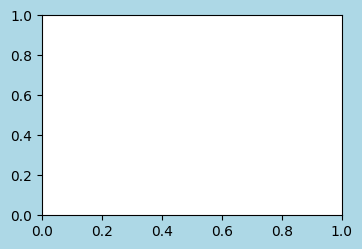

In [38]:
w, h = 4, 3
margin = 0.5
fig = plt.figure(figsize=(w, h), facecolor='lightblue')
ax = fig.add_axes([margin / w, margin / h, (w - 2 * margin) / w,
                      (h - 2 * margin) / h])

#### High-level methods for making grids
#### Basic 2x2 grid
- We can create a basic 2-by-2 grid of Axes using subplots. It returns a Figure instance and an array of Axes objects. The Axes objects can be used to access methods to place artists on the Axes; here we use annotate, but other examples could be plot, pcolormesh, etc.

Text(0.5, 0.98, 'plt.subplots()')

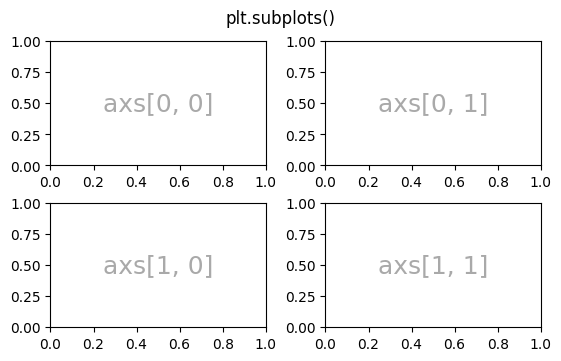

In [39]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

- We will annotate a lot of Axes, so let's encapsulate the annotation, rather than having that large piece of annotation code every time we need it:

In [40]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

- The same effect can be achieved with subplot_mosaic, but the return type is a dictionary instead of an array, where the user can give the keys useful meanings. Here we provide two lists, each list representing a row, and each element in the list a key representing the column.

Text(0.5, 0.98, 'plt.subplot_mosaic()')

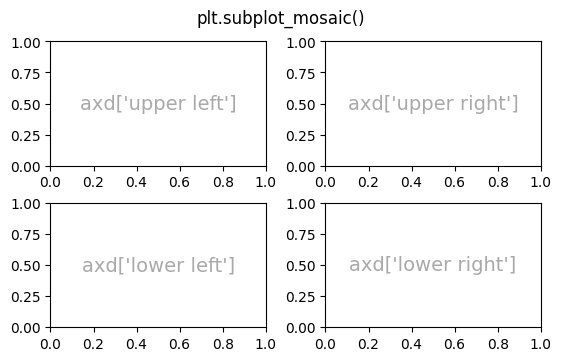

In [41]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

#### Grids of fixed-aspect ratio Axes
Fixed-aspect ratio Axes are common for images or maps. However, they present a challenge to layout because two sets of constraints are being imposed on the size of the Axes - that they fit in the figure and that they have a set aspect ratio. This leads to large gaps between Axes by default:

Text(0.5, 0.98, 'Fixed aspect Axes')

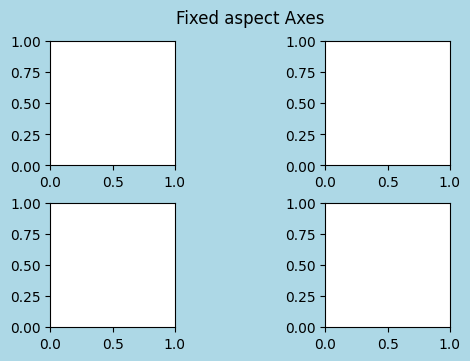

In [42]:
fig, axs = plt.subplots(2, 2, layout="constrained",
                        figsize=(5.5, 3.5), facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes')

- One way to address this is to change the aspect of the figure to be close to the aspect ratio of the Axes, however that requires trial and error. Matplotlib also supplies layout="compressed", which will work with simple grids to reduce the gaps between Axes. (The mpl_toolkits also provides ImageGrid to accomplish a similar effect, but with a non-standard Axes class).

Text(0.5, 0.98, 'Fixed aspect Axes: compressed')

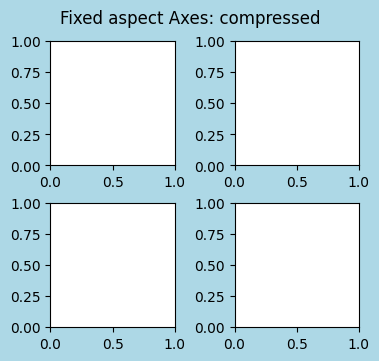

In [43]:
fig, axs = plt.subplots(2, 2, layout="compressed", figsize=(5.5, 3.5),
                        facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes: compressed')

#### Axes spanning rows or columns in a grid
- Sometimes we want Axes to span rows or columns of the grid. There are actually multiple ways to accomplish this, but the most convenient is probably to use subplot_mosaic by repeating one of the keys:

Text(0.5, 0.98, 'plt.subplot_mosaic()')

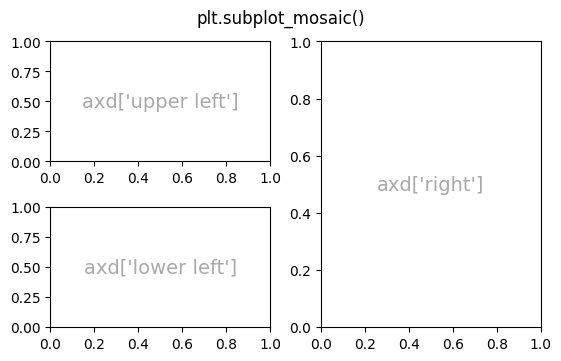

In [44]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

- See below for the description of how to do the same thing using GridSpec or subplot2grid.

#### Variable widths or heights in a grid
- Both subplots and subplot_mosaic allow the rows in the grid to be different heights, and the columns to be different widths using the gridspec_kw keyword argument. Spacing parameters accepted by GridSpec can be passed to subplots and subplot_mosaic:

Text(0.5, 0.98, 'plt.subplot_mosaic()')

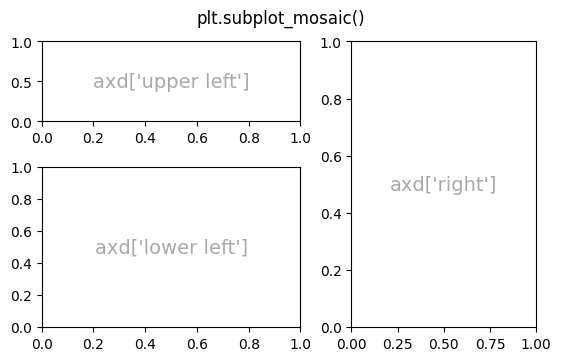

In [45]:
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

#### Nested Axes layouts
- Sometimes it is helpful to have two or more grids of Axes that may not need to be related to one another. The most simple way to accomplish this is to use Figure.subfigures. Note that the subfigure layouts are independent, so the Axes spines in each subfigure are not necessarily aligned. See below for a more verbose way to achieve the same effect with GridSpecFromSubplotSpec.

Text(0.02, 0.5, 'ylabel for subfigs[1]')

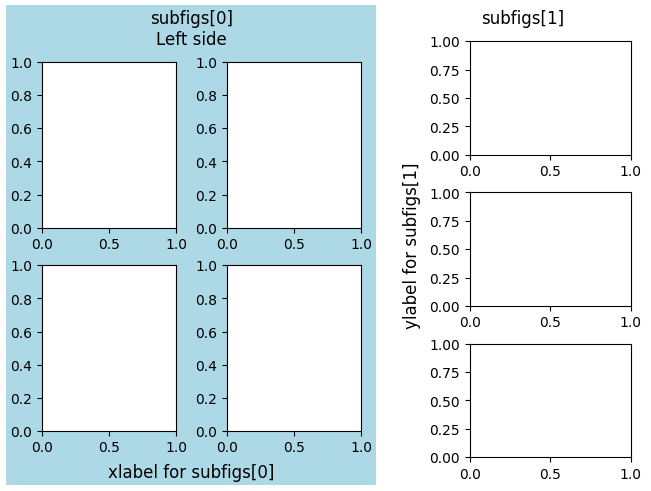

In [46]:
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('lightblue')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

- It is also possible to nest Axes using subplot_mosaic using nested lists. This method does not use subfigures, like above, so lacks the ability to add per-subfigure suptitle and supxlabel, etc. Rather it is a convenience wrapper around the subgridspec method described below.

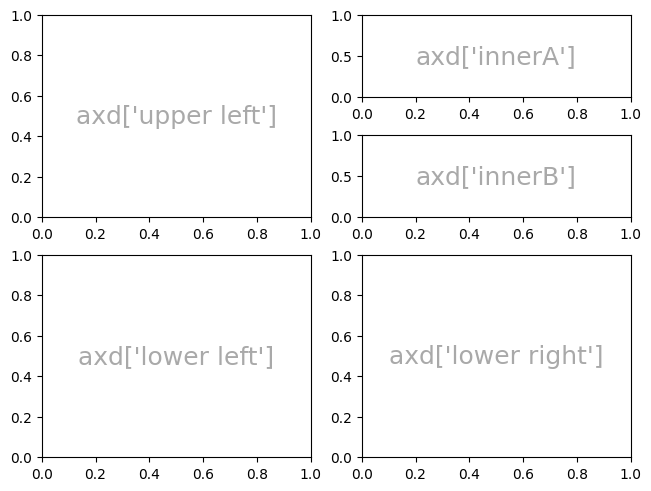

In [47]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]')

#### Low-level and advanced grid methods
- Internally, the arrangement of a grid of Axes is controlled by creating instances of GridSpec and SubplotSpec. GridSpec defines a (possibly non-uniform) grid of cells. Indexing into the GridSpec returns a SubplotSpec that covers one or more grid cells, and can be used to specify the location of an Axes.

- The following examples show how to use low-level methods to arrange Axes using GridSpec objects.

#### Basic 2x2 grid
- We can accomplish a 2x2 grid in the same manner as plt.subplots(2, 2):

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

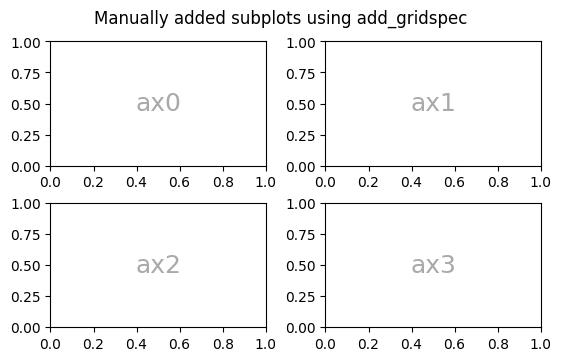

In [48]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

fig.suptitle('Manually added subplots using add_gridspec')

#### Axes spanning rows or grids in a grid
- We can index the spec array using NumPy slice syntax and the new Axes will span the slice. This would be the same as fig, axd = plt.subplot_mosaic([['ax0', 'ax0'], ['ax1', 'ax2']], ...):

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

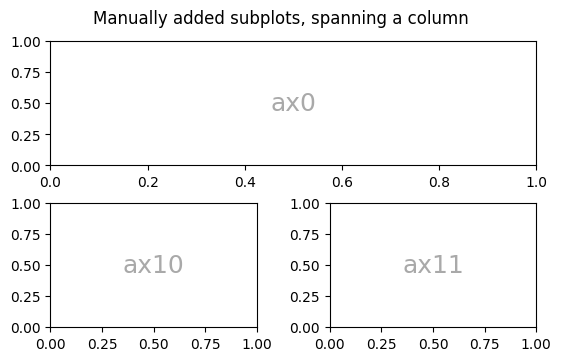

In [49]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

fig.suptitle('Manually added subplots, spanning a column')

#### Manual adjustments to a GridSpec layout
- When a GridSpec is explicitly used, you can adjust the layout parameters of subplots that are created from the GridSpec. Note this option is not compatible with constrained layout or Figure.tight_layout which both ignore left and right and adjust subplot sizes to fill the figure. Usually such manual placement requires iterations to make the Axes tick labels not overlap the Axes.

- These spacing parameters can also be passed to subplots and subplot_mosaic as the gridspec_kw argument.

Text(0.5, 0.98, 'Manual gridspec with right=0.75')

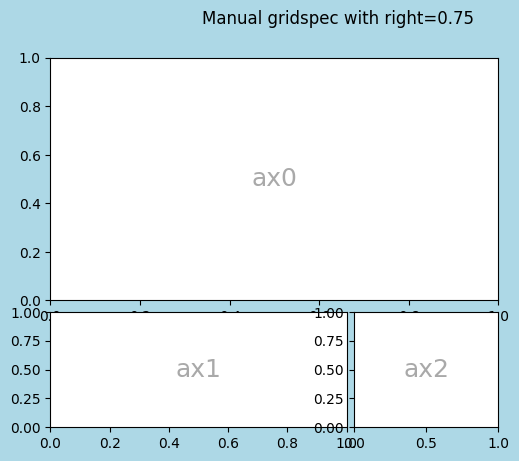

In [50]:
fig = plt.figure(layout=None, facecolor='lightblue')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75,
                      hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

#### Nested layouts with SubplotSpec
- You can create nested layout similar to subfigures using subgridspec. Here the Axes spines are aligned.

- **Note**: this is also available from the more verbose gridspec.GridSpecFromSubplotSpec.

Text(0.5, 0.98, 'nested gridspecs')

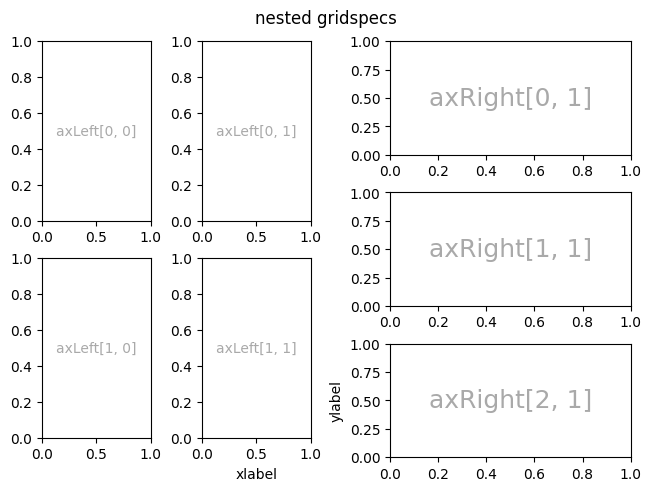

In [51]:
fig = plt.figure(layout="constrained")
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}]')
    if a == 2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

- Here's a more sophisticated example of nested GridSpec: We create an outer 4x4 grid with each cell containing an inner 3x3 grid of Axes. We outline the outer 4x4 grid by hiding appropriate spines in each of the inner 3x3 grids.

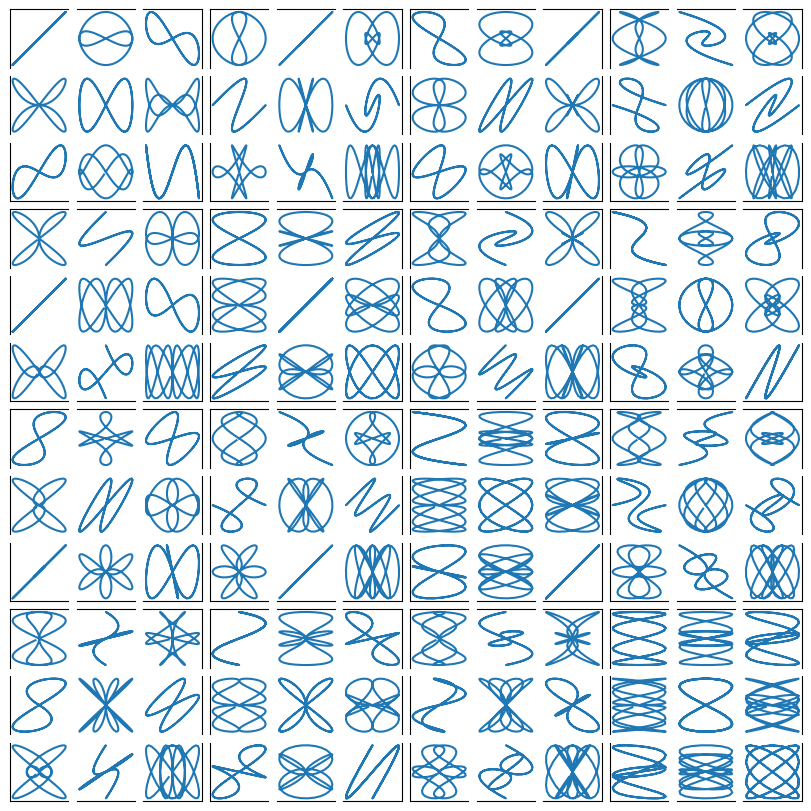

In [52]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8), layout='constrained')
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())

plt.show()